In [1]:
import os,sys

In [2]:
sys.path.append( os.path.abspath('../src')  )

In [3]:
import numpy as np

from hyperopt import fmin, tpe, hp,  STATUS_OK, Trials
from matplotlib import pyplot as plt

In [4]:
from urban import building, city # Our module that contains everything

In [5]:
c = city.city_from_file(os.path.abspath("../datafiles/b_short_walk.in")) # The not so 'short' file

In [6]:
c.B # Number of buildings

200

In [7]:
len(c.to_builds) # Number of buildings

200

(array([60., 18., 14.,  5.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

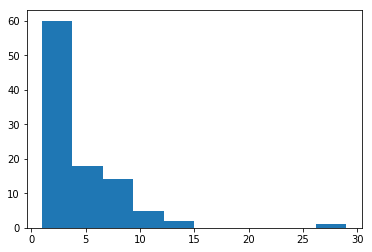

In [8]:
plt.hist([b.capacity for b in c.to_builds if not b.capacity is None ]) # dist. of residents/rewards

## Here, we're gonna the TPE algorithm, from hyperopt package

In [9]:
%%time
trials = Trials()
best = fmin(fn= c.builder__scorer , space = [(hp.qnormal("i%d"%t, 100, 48, 1),
            hp.qnormal("j%d"%t,100, 48,1)) for t in range(200)], 
            trials = Trials(), algo=tpe.suggest, max_evals= 2)
# print(best)

Wall time: 13.9 s


In [10]:
# trials.losses()

In [11]:
sol = [(best["i%d"%t], best["j%d"%t]) for t in range(200)]
print(sol[:20])

[(226.0, 143.0), (143.0, 140.0), (108.0, 93.0), (97.0, 52.0), (81.0, 95.0), (60.0, 114.0), (40.0, 46.0), (108.0, 87.0), (82.0, 111.0), (104.0, 146.0), (-3.0, 19.0), (78.0, 182.0), (41.0, 102.0), (53.0, 14.0), (18.0, 12.0), (133.0, 106.0), (194.0, 11.0), (59.0, 22.0), (82.0, 88.0), (64.0, 181.0)]


In [12]:
%%time
c.builder__scorer(sol)

Wall time: 6.32 s


{'loss': -47, 'status': 'ok'}